# 1. Gerekli Kütüphanelerin Tanımlanması

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras import layers

from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

**Kendimiz random olarak bir veri seti oluşturuyoruz. İşlemlerimizi bu veri seti üzerinden gerçekleştireceğiz.**

In [2]:
x,y = make_classification(n_samples = 100000, n_features = 15, n_classes = 2, weights=[0.400,0.600])
df = pd.DataFrame(x)
df['target'] = y
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,0.444033,0.980284,0.026240,2.814989,0.070037,-0.344521,1.303631,0.164415,-0.182458,-0.883997,0.988804,-0.346748,0.807436,-0.625362,-1.334936,1
1,0.513329,1.345759,1.293751,0.146817,-0.583207,-1.254045,0.486024,0.332378,-0.424512,-0.020469,-0.286701,-0.168421,0.425206,-1.499339,-0.370067,1
2,-0.836233,-0.232405,1.506854,0.021351,0.799924,0.631137,0.811808,0.282120,0.752303,0.460517,-0.946986,0.546875,0.908960,-0.208712,-0.413862,1
3,0.523798,-0.627196,0.836988,-0.210179,0.023126,0.058376,0.453034,-1.049488,-0.488274,2.513042,2.788019,0.168359,1.413561,0.917843,0.700555,0
4,-1.800664,-1.201363,0.625370,0.429716,0.921570,-0.256448,2.758924,-0.822900,-0.034830,-0.677818,-0.887135,0.678383,2.188073,1.287365,-2.332584,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.837666,0.611056,0.510594,0.255343,-1.270998,-0.508126,3.065689,0.014924,-0.542937,1.860712,-0.388949,-0.439820,3.481434,0.404568,-1.512678,1
99996,0.479847,0.047895,-0.368875,-0.478105,0.187091,0.233649,0.543119,-0.044139,-0.511461,0.854457,0.297644,0.517366,0.827603,0.932386,-0.051294,1
99997,-0.191897,0.483038,-0.263103,-0.583492,0.720942,-0.561604,-1.370565,1.281308,1.239660,-0.660240,-0.271349,-0.171427,-1.487486,-0.874081,0.747128,0
99998,-0.300153,-0.640380,-1.397626,0.374834,0.124595,1.056509,-0.547347,1.740574,-0.383206,-0.365914,0.559896,0.125193,-0.635113,1.413676,0.256158,1


**Verimizi train ve test olarak ayırma işlemini gerçekleşiriyoruz.**

In [3]:
def standard_scaler(x_train, x_test):
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train, x_test

In [4]:
def pca_three(x_train, x_test):
    x_train,x_test = standard_scaler(x_train, x_test)
    pca = PCA(n_components = 3)
    x_reduced = pca.fit(x_train).transform(x_test)
    return x_reduced

In [5]:
def pca_two(x_train, x_test):
    x_train, x_test = standard_scaler(x_train, x_test)
    pca = PCA(n_components = 2)
    x_reduced = pca.fit(x_train).transform(x_test)
    return x_reduced

In [6]:
def pca_two_visualization(x_reduced, y_test):
    plt.figure(figsize = (10,10))
    plt.title("Two Dimension Distribution Plot")
    plt.scatter(x_reduced[:,0], x_reduced[:,1], c = y_test)
    plt.show()

In [7]:
def pca_three_visualization(x_reduced, y_test):
    fig = plt.figure(figsize = (10,10))
    plt.title("Three Dimension Distribution Plot")
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(x_reduced[:,0], x_reduced[:,1],x_reduced[:,2], c =y_test)
    plt.show()

In [8]:
features = df.drop('target', axis = 1)
label = df['target']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state = 42)

**PCA işlemini gerçekleştirelim ve görselleştirelim.**

In [9]:
x_reduced_two  = pca_two(x_train, x_test)
x_reduced_three = pca_three(x_train,x_test)

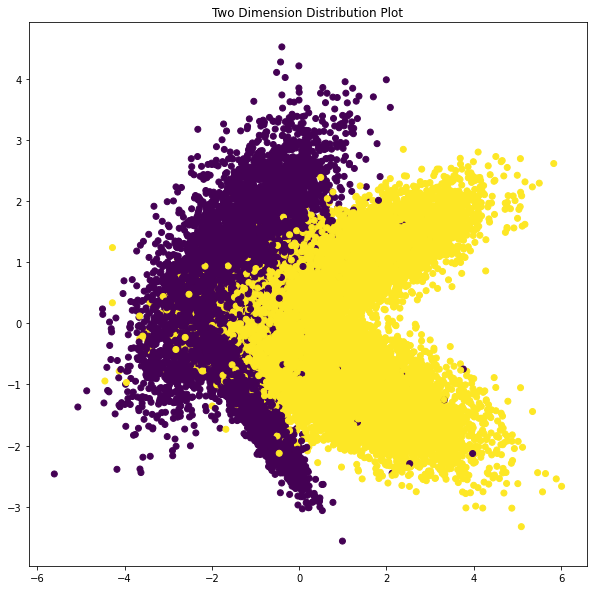

In [10]:
pca_two_visualization(x_reduced_two,y_test)

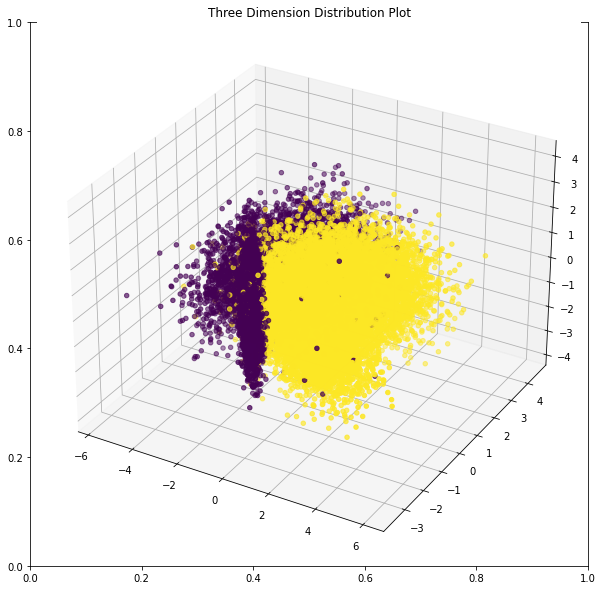

In [11]:
pca_three_visualization(x_reduced_three, y_test)

# 2- Random Forest Algoritması Uygulaması Ve Sonuçları

In [12]:
%%time
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_rf = lr.predict(x_test)

print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     13651
           1       0.88      0.90      0.89     19349

    accuracy                           0.87     33000
   macro avg       0.87      0.87      0.87     33000
weighted avg       0.87      0.87      0.87     33000

CPU times: total: 344 ms
Wall time: 147 ms


**Görselleştirme işlemi sonrasında gözlemleyelim**

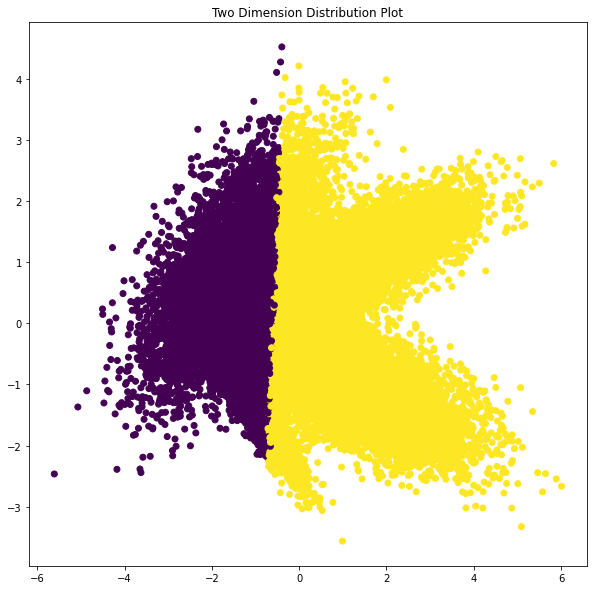

In [13]:
pca_two_visualization(x_reduced_two, y_pred_rf)

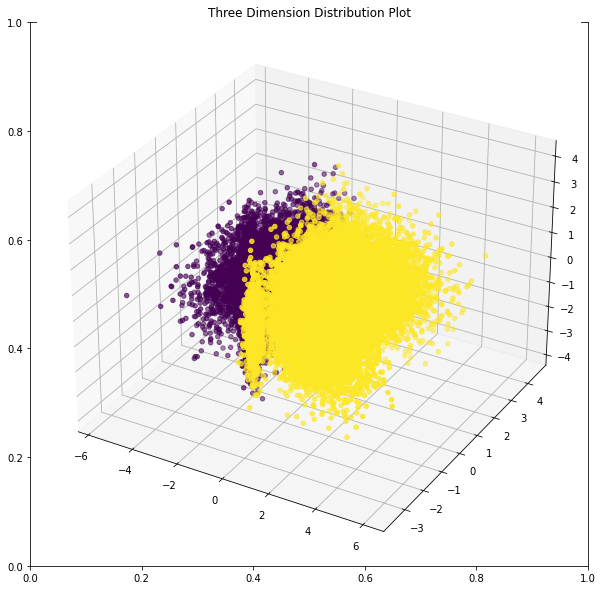

In [14]:
pca_three_visualization(x_reduced_three, y_pred_rf)

# 3 - DNN Kullanarak Öğrenme ve Sonuçları Gösterme

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(8),
    layers.Dense(4),
    layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x_train, y_train,epochs=20)
print("Model Input Shape:", model.input_shape)
print("Model Output Shape:", model.output_shape)

Epoch 1/20
2094/2094 [==============================] - 4s 1ms/step - loss: 0.3224
Epoch 2/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3187
Epoch 3/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3183
Epoch 4/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3181
Epoch 5/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3181
Epoch 6/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3178
Epoch 7/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3176
Epoch 8/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3177
Epoch 9/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3175
Epoch 10/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3175
Epoch 11/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3175
Epoch 12/20
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3175
E

In [17]:
y_pred_dnn = model.predict(x_test)

1032/1032 [==============================] - 1s 842us/step


In [18]:
y_pred_dnn[y_pred_dnn > 0.5] = 1
y_pred_dnn[y_pred_dnn <= 0.5] = 0

In [19]:
model.evaluate(x_test, y_test)

1032/1032 [==============================] - 1s 939us/step - loss: 0.3107


0.31074896454811096

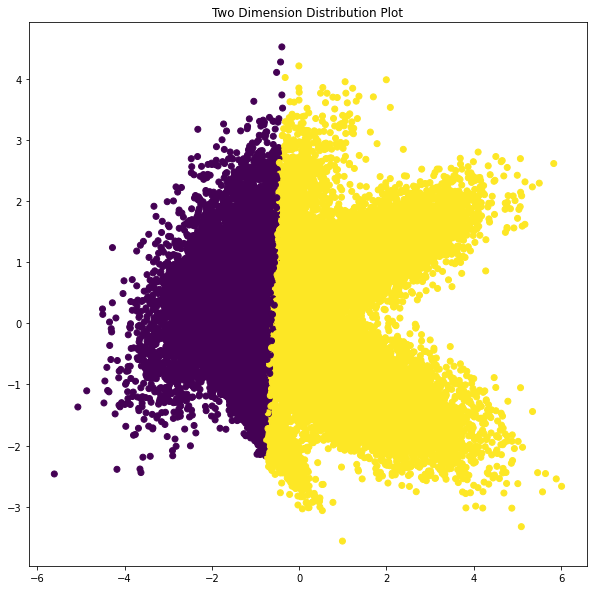

In [20]:
pca_two_visualization(x_reduced_two, y_pred_dnn)

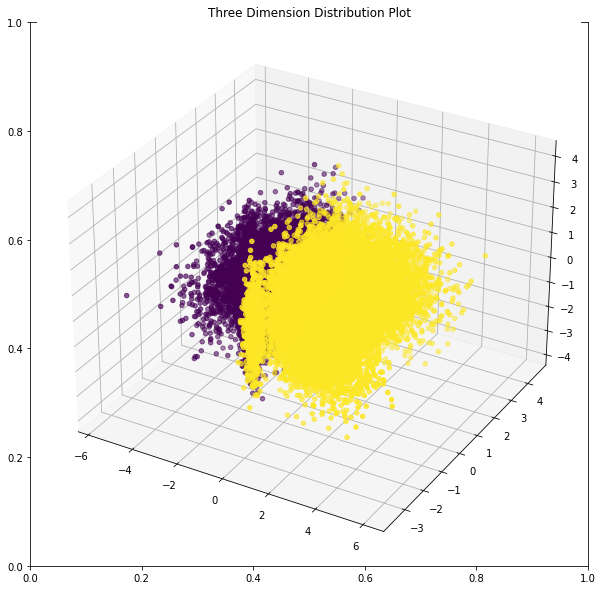

In [21]:
pca_three_visualization(x_reduced_three, y_pred_dnn)

In [22]:
print(classification_report(y_pred_dnn, y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84     13548
         1.0       0.89      0.90      0.89     19452

    accuracy                           0.87     33000
   macro avg       0.87      0.87      0.87     33000
weighted avg       0.87      0.87      0.87     33000

